In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploratory Data Analysis (EDA)**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/smart_home_energy_modified.csv', parse_dates=['Date'])
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [35]:
print("Shape:", df.shape)

Shape: (100010, 8)


In [36]:
print("Data types:\n", df.dtypes)

Data types:
 Home ID                              int64
Appliance Type                      object
Energy Consumption (kWh)           float64
Time                                object
Date                        datetime64[ns]
Outdoor Temperature (°C)           float64
Season                              object
Household Size                       int64
dtype: object


In [37]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Home ID                        0
Appliance Type              2000
Energy Consumption (kWh)    2010
Time                           0
Date                           0
Outdoor Temperature (°C)       0
Season                         0
Household Size                 0
dtype: int64


In [38]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 10


In [39]:
print("\nDescriptive Stats:\n", df.describe())


Descriptive Stats:
              Home ID  Energy Consumption (kWh)                           Date  \
count  100010.000000              98000.000000                         100010   
mean      250.377802                  1.503194  2023-07-02 00:10:16.834316288   
min         1.000000                  0.100000            2023-01-01 00:00:00   
25%       125.000000                  0.590000            2023-04-02 00:00:00   
50%       250.000000                  1.230000            2023-07-01 00:00:00   
75%       375.000000                  1.870000            2023-10-02 00:00:00   
max       500.000000                204.000000            2024-01-01 00:00:00   
std       144.433317                  1.361841                            NaN   

       Outdoor Temperature (°C)  Household Size  
count             100010.000000   100010.000000  
mean                  14.950269        3.001740  
min                  -10.000000        1.000000  
25%                    2.400000        2.000000  

**Boxplot of Energy Consumption (kWh)**

→ Identifying outliers to see how data is spread.


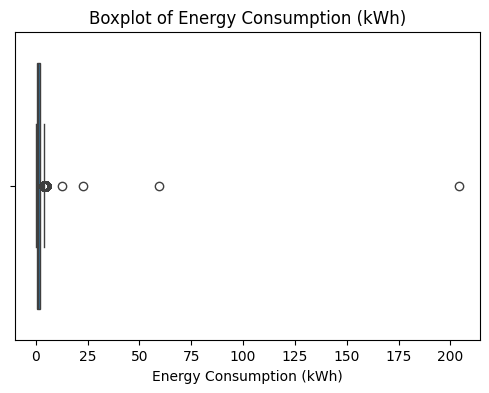

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Energy Consumption (kWh)'])
plt.title('Boxplot of Energy Consumption (kWh)')
plt.show()


**Bar Plot: Average energy consumption per Appliance Type**

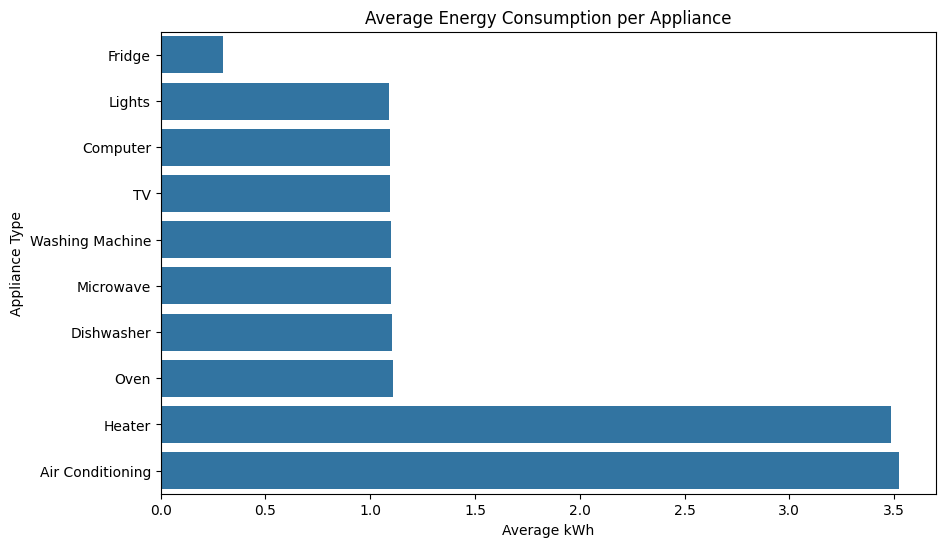

In [41]:
plt.figure(figsize=(10, 6))
app_avg = df.groupby('Appliance Type')['Energy Consumption (kWh)'].mean().sort_values()
sns.barplot(x=app_avg.values, y=app_avg.index)
plt.title('Average Energy Consumption per Appliance')
plt.xlabel('Average kWh')
plt.ylabel('Appliance Type')
plt.show()


**Share of total energy consumption by Appliance Type**

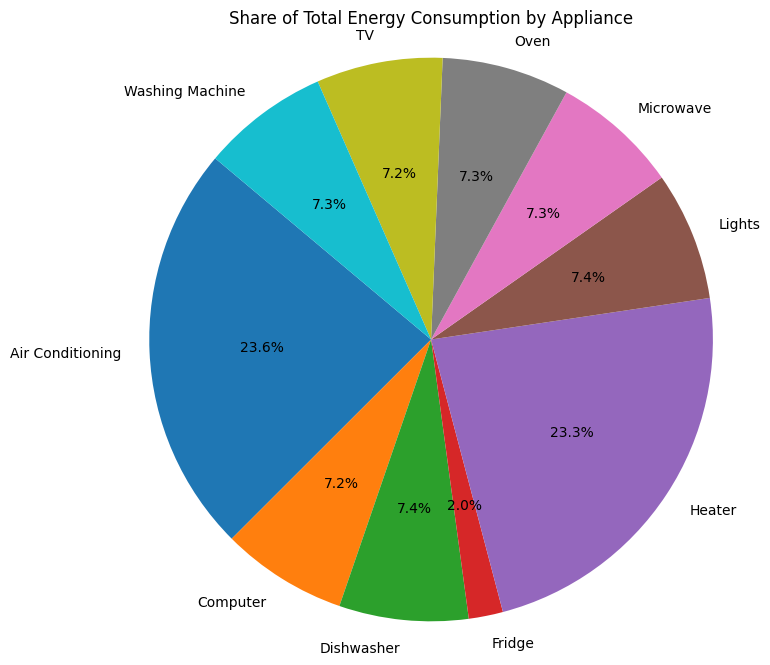

In [42]:
plt.figure(figsize=(8, 8))
app_total = df.groupby('Appliance Type')['Energy Consumption (kWh)'].sum()
plt.pie(app_total, labels=app_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Total Energy Consumption by Appliance')
plt.axis('equal')
plt.show()


**Monthly Usage Frequency of Top Appliances**

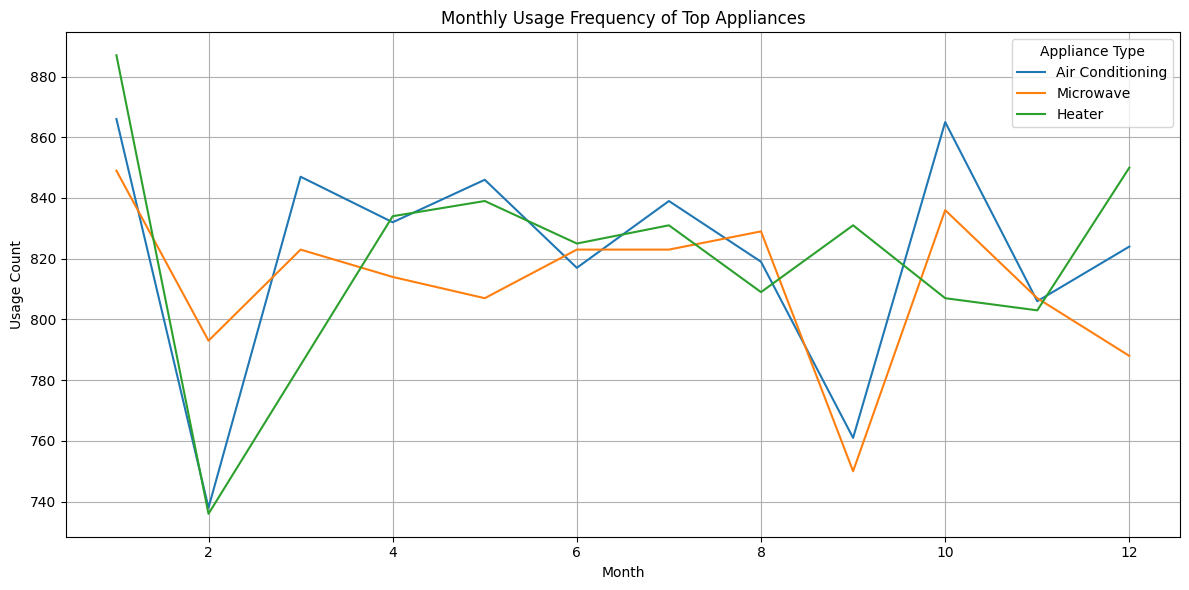

In [43]:
df['month'] = pd.to_datetime(df['Date']).dt.month

monthly_counts = df.groupby(['month', 'Appliance Type']).size().unstack().fillna(0)

# Plot for a few top appliance types
monthly_counts[['Air Conditioning', 'Microwave', 'Heater']].plot(figsize=(12,6))
plt.title('Monthly Usage Frequency of Top Appliances')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.grid(True)
plt.tight_layout()
plt.show()



# Preprocessing

**Fill Missing Values**

In [44]:
df['Appliance Type'].fillna(df['Appliance Type'].mode()[0], inplace=True)

<ipython-input-44-842d6d011cda>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Appliance Type'].fillna(df['Appliance Type'].mode()[0], inplace=True)


In [45]:
df['Energy Consumption (kWh)'].fillna(df['Energy Consumption (kWh)'].median(), inplace=True)

<ipython-input-45-d54e3b6d556a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Energy Consumption (kWh)'].fillna(df['Energy Consumption (kWh)'].median(), inplace=True)


**Drop Duplicate Rows**

In [46]:
df = df.drop_duplicates()
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


**Date Breakdown for Analysis**

In [47]:
df['Date'] = pd.to_datetime(df['Date'])


df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['week'] = df['Date'].dt.isocalendar().week


In [48]:
df.columns

Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date',
       'Outdoor Temperature (°C)', 'Season', 'Household Size', 'month', 'year',
       'day', 'dayofweek', 'week'],
      dtype='object')

**Removing Outliers using IQR**

In [49]:
q1 = df['Energy Consumption (kWh)'].quantile(0.25)
q3 = df['Energy Consumption (kWh)'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df = df[(df['Energy Consumption (kWh)'] >= lower) & (df['Energy Consumption (kWh)'] <= upper)]


# **Feature Engineering**

In [50]:
df['energy_level'] = pd.qcut(df['Energy Consumption (kWh)'], q=3, labels=['Low', 'Medium', 'High'])

<ipython-input-50-f393e0ad3125>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_level'] = pd.qcut(df['Energy Consumption (kWh)'], q=3, labels=['Low', 'Medium', 'High'])


In [51]:
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['minute'] = pd.to_datetime(df['Time'], format='%H:%M').dt.minute

In [52]:
import numpy as np
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)


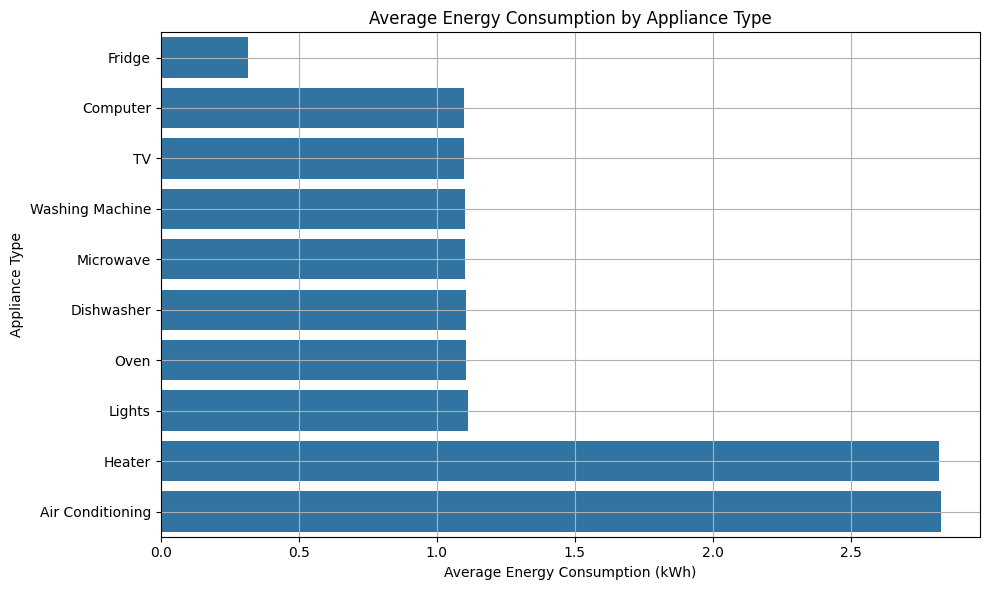

In [53]:
df['appliance_avg'] = df.groupby('Appliance Type')['Energy Consumption (kWh)'].transform('mean')

plot_df = df[['Appliance Type', 'appliance_avg']].drop_duplicates().sort_values(by='appliance_avg')

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='appliance_avg', y='Appliance Type')
plt.title('Average Energy Consumption by Appliance Type')
plt.xlabel('Average Energy Consumption (kWh)')
plt.ylabel('Appliance Type')
plt.grid(True)
plt.tight_layout()
plt.show()

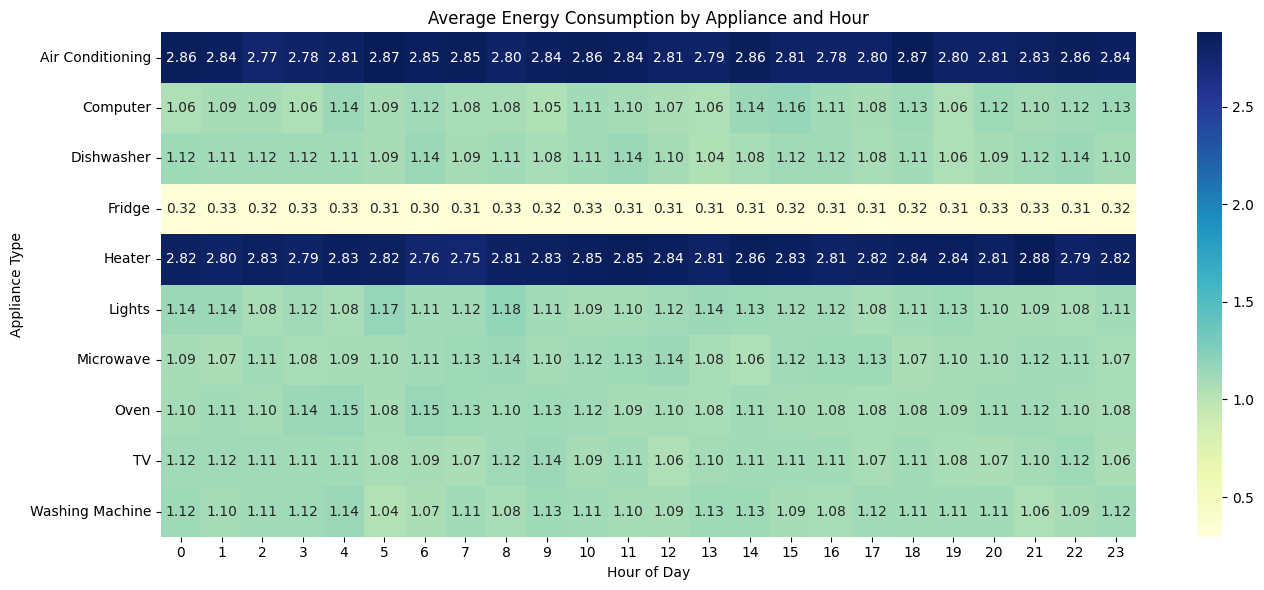

In [54]:
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['appliance_hour'] = df['Appliance Type'] + "_" + df['hour'].astype(str)

pivot_df = df.pivot_table(values='Energy Consumption (kWh)',
                          index='Appliance Type',
                          columns='hour',
                          aggfunc='mean')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Energy Consumption by Appliance and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Appliance Type')
plt.tight_layout()
plt.show()


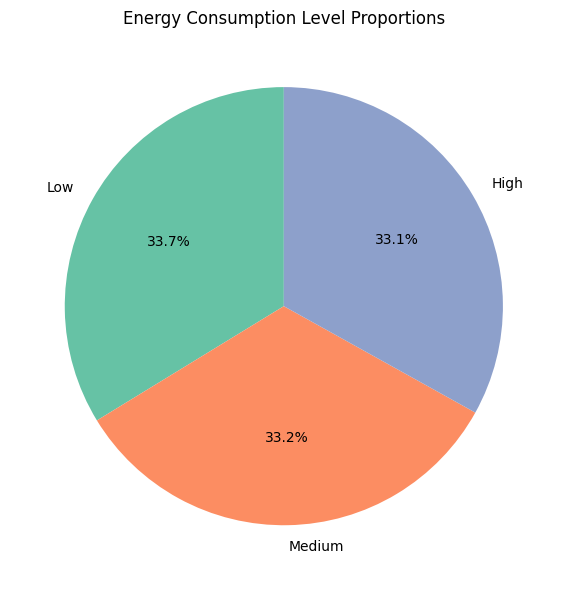

In [55]:
df['energy_level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors=sns.color_palette('Set2'))
plt.title('Energy Consumption Level Proportions')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [56]:
from sklearn.preprocessing import OrdinalEncoder
import pickle

cols_to_encode = ['Appliance Type', 'Season','energy_level']

oe = OrdinalEncoder()
df[cols_to_encode] = oe.fit_transform(df[cols_to_encode])


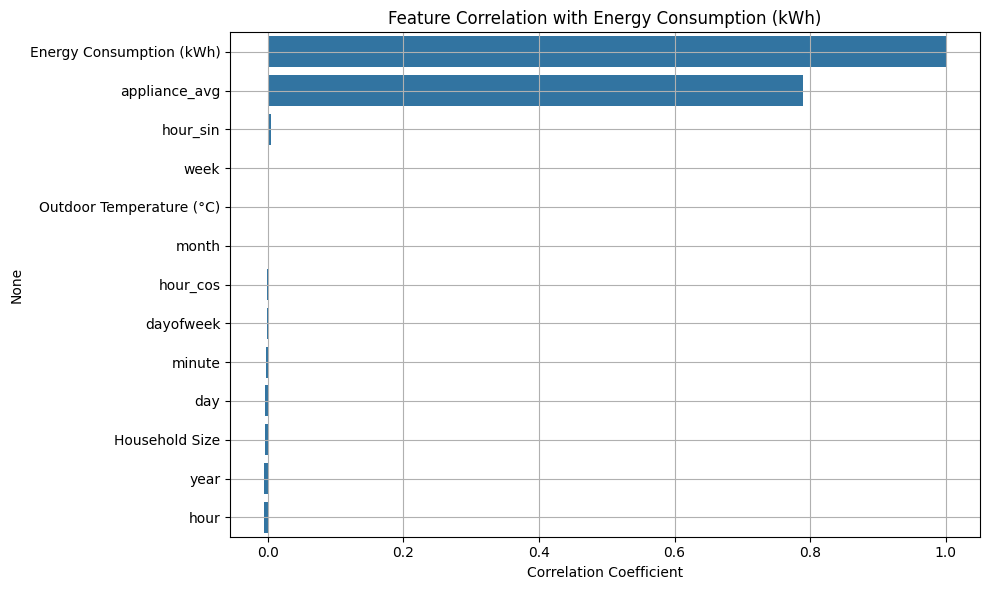

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
numeric_cols = [
    'Outdoor Temperature (°C)', 'Household Size', 'month', 'year', 'day', 'dayofweek',
    'week', 'hour', 'minute', 'hour_sin', 'hour_cos', 'appliance_avg',
]

# Add the target
correlation_df = df[numeric_cols + ['Energy Consumption (kWh)']]

# Compute correlations with the target
correlations = correlation_df.corr()['Energy Consumption (kWh)'].sort_values(ascending=False)

# Display as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Energy Consumption (kWh)')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.grid(True)
plt.show()


**Scaling**

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Energy Consumption (kWh)', 'Outdoor Temperature (°C)']] = scaler.fit_transform(
    df[['Energy Consumption (kWh)', 'Outdoor Temperature (°C)']]
)


# **Machine Learning Models**

In [59]:
X = df.drop(columns=['Energy Consumption (kWh)','Date', 'Time','Home ID','energy_level','appliance_hour'])
y = df['Energy Consumption (kWh)']

In [60]:
X.columns

Index(['Appliance Type', 'Outdoor Temperature (°C)', 'Season',
       'Household Size', 'month', 'year', 'day', 'dayofweek', 'week', 'hour',
       'minute', 'hour_sin', 'hour_cos', 'appliance_avg'],
      dtype='object')

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                    scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, best_preds))
r2 = r2_score(y_test, best_preds)

print("Tuned Random Forest")
print("Best Parameters:", grid.best_params_)
print("RMSE:", rmse)
print("R² Score:", r2)



Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tuned Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 0.614696323661094
R² Score: 0.6258486743351372


In [66]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.05, 0.1]
}

model = xgb.XGBRegressor(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='rmse'
)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
print("R² Score:", r2_score(y_test, preds))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:35:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.6169861947384432
R² Score: 0.6230558998636492


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:35:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.4f}")


Linear Regression: RMSE = 0.61, R² = 0.6266
Random Forest: RMSE = 0.63, R² = 0.6131
Gradient Boosting: RMSE = 0.61, R² = 0.6261
XGBoost: RMSE = 0.63, R² = 0.6113


In [68]:
import joblib
joblib.dump(best_model, 'rfmlmodel.pkl')

with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(oe, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)